## __Find the Global Maximum__

__Problem:__

We will attempt to use our genetic algorithm to find the minumum y-value on the graph:

$$
y = x \sin(x), \quad \text{for } x \in [0,10]
$$

_Note:_
- This section of the graph is bimodal

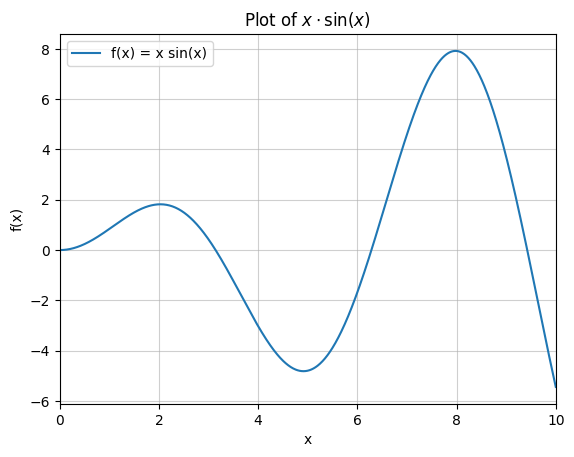

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Let's make a plot!
f = lambda x : x * np.sin(x)

x_values = np.linspace(0, 10, 1000)
y_values = f(x_values)

plt.plot(x_values, y_values, label='f(x) = x sin(x)')
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $x \cdot \sin(x)$')
plt.grid(True, alpha=0.6)
plt.legend()
plt.show()

We can clearly see two maxima on this graph.

- $2$, around $x=2$

- $8$, around $x=8$

Great! Now, we know what to target.

Let's put our [__pyvolver__](./pyvolver/) package to good use, and approximate the global maximum with a genetic algorithm!

- We will encode solutions __(x-values)__ as the species' singular gene

- The fitness of an individual will be equal to the __y-values__

In [187]:
import pyvolver

# Step 1) Encode solutions as chromosomes
my_chrom = pyvolver.create_numeric_chromosome(1, (0,10), pyvolver.CrossoverType.AX, _mutation_std_dev=0.15) # finer grain mutation

# Step 2) Create a species to store and evaluate a solution
def get_fitness(self: pyvolver.Organism):
	x = self[0][0] # chromosome 1, gene 1
	return x * math.sin(x)
my_species = pyvolver.create_species('GlobalMax', get_fitness, my_chrom)

# Step 3) Create a population of this species
flags = pyvolver.EvolveFlags.MATE_WITH_OTHERS # add random individuals to the mating pool so we can explore both curves
my_pop = pyvolver.Population(my_species, evolve_options=flags)
print(my_pop) # show initial

--- Generation 0 ---

Member 1)
  Chromosome 1:   8.6122
  Fitness:        6.25301

Member 2)
  Chromosome 1:   7.26256
  Fitness:        6.02901

Member 3)
  Chromosome 1:   9.04506
  Fitness:        3.35262

Member 4)
  Chromosome 1:   2.54267
  Fitness:        1.43343

Member 5)
  Chromosome 1:   0.349949
  Fitness:        0.11998

Member 6)
  Chromosome 1:   6.30188
  Fitness:        0.117782

Member 7)
  Chromosome 1:   6.24765
  Fitness:        -0.22196

Member 8)
  Chromosome 1:   6.06181
  Fitness:        -1.33098


In [245]:
# Step 4) Evolve!
my_pop.evolve(n=100) # pass 10 generations
print(my_pop)

--- Generation 5800 ---

Member 1)
  Chromosome 1:   7.9786
  Fitness:        7.91673

Member 2)
  Chromosome 1:   7.9786
  Fitness:        7.91673

Member 3)
  Chromosome 1:   7.9786
  Fitness:        7.91673

Member 4)
  Chromosome 1:   7.9786
  Fitness:        7.91673

Member 5)
  Chromosome 1:   7.9786
  Fitness:        7.91673

Member 6)
  Chromosome 1:   7.9786
  Fitness:        7.91673

Member 7)
  Chromosome 1:   7.85197
  Fitness:        7.91673

Member 8)
  Chromosome 1:   8.135
  Fitness:        7.91673


In [248]:
# Our best solution
s = my_pop.solution

# Its fitness is the y-value, its only gene is the x-value
print(f'Maximum: y = {s.fitness}')
print(f'Found at: x = {s[0][0]}')

Maximum: y = 7.916727355452462
Found at: x = 7.978602846557507


It looks like we were successfully able to target the larger maxima, and approximate a reasonable solution.

Next, let's showcase the flexibility of our `pyvolver` package by solving a permutation problem.

### __Useful Links__

- [Travelling Salesman Problem](./atsp.ipynb)